# 进港、出港航班

获取单天的航班的计划出站时间和实际到达时间，由此可以计算出
1. 计划任务执行时间
2. 实际任务执行时间

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_in = pd.read_excel('../data/机务维修中心进港2月.xlsx')
df_out = pd.read_excel('../data/机务维修中心出港2月.xlsx')
df_in['计达时间'] = pd.to_datetime(df_in['计达时间'])
df_in['实达时间'] = pd.to_datetime(df_in['实达时间'])
df_out['计飞时间'] = pd.to_datetime(df_out['计飞时间'])
df_out['实飞时间'] = pd.to_datetime(df_out['实飞时间'])
# 新增 date 列
df_in['plan_date'] = df_in['计达时间'].dt.date
df_out['plan_date'] = df_out['计飞时间'].dt.date
# 新增 time列
df_in['plan_time'] = df_in['计达时间'].dt.time
df_out['plan_time'] = df_out['计飞时间'].dt.time
# 新增 实际 
df_in['actual_date'] = df_in['实达时间'].dt.date
df_out['actual_date'] = df_out['实飞时间'].dt.date
# 新增 time列
df_in['actual_time'] = df_in['实达时间'].dt.time
df_out['actual_time'] = df_out['实飞时间'].dt.time

df_in.drop(['姓名','工号','部门','任务状态','任务名','任务确认时间','任务开始时间','任务结束时间','派工时间','备注'], inplace=True,axis=1)
# 去除重复
df_in.drop_duplicates(inplace=True)
df_out.drop(['姓名','工号','部门','任务状态','任务名','任务确认时间','任务开始时间','任务结束时间','派工时间','备注'], inplace=True,axis=1)
# 去除重复
df_out.drop_duplicates(inplace=True)


/Users/chenxia/miniconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/chenxia/miniconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Text(0.5, 1.0, 'Number of inbound and outbound tasks per day')

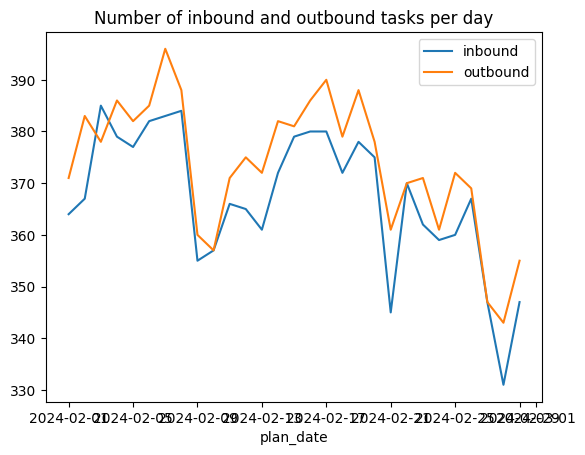

In [28]:
df_in.groupby('plan_date').size().plot()
df_out.groupby('plan_date').size().plot()
plt.legend(['inbound', 'outbound'])
plt.title('Number of inbound and outbound tasks per day')

In [45]:
df_air = pd.read_excel('../data/航司资质要求.xlsx')
# 删除航班类型为 '货' 的行
df_air = df_air[df_air['航班类型'] != '货']
# 填补 一般勤务 非1 的行为 0
df_air.loc[df_air['一般勤务']!=1,'一般勤务'] = 0
df_air['一般勤务'] = df_air['一般勤务'].astype(int)
# 填补 机务勤务 非1 的行为 0
df_air.loc[df_air['放行机务']!=1,'放行机务'] = 0
df_air['放行机务'] = df_air['放行机务'].astype(int)

df_air.loc[df_air['维修机务']!=1,'维修机务'] = 0
df_air['维修机务'] = df_air['维修机务'].astype(int)

df_air.loc[df_air['英文耳机']!=1,'英文耳机'] = 0
df_air['英文耳机'] = df_air['英文耳机'].astype(int)

df_air.loc[df_air['中文耳机']!=1,'中文耳机'] = 0
df_air['中文耳机'] = df_air['中文耳机'].astype(int)

df_air.drop(['序号'],axis=1,inplace=True)


In [46]:
df_air.head()

,航空公司,二字代码,航班类型,停机坪,一般勤务,放行机务,维修机务,英文耳机,中文耳机
0,国泰航空,CX,客,T2,1,0,0,0,0
2,美国航空,AA,客,T2,1,0,0,0,0
3,阿联酋航空,EK,客,T2,1,0,0,0,0
4,俄罗斯航空,SU,客,T2,1,0,0,1,0
5,加拿大航空,AC,客,T2,1,0,0,0,0


In [35]:
# 保存到 航空公司保存到航班号前 2
df_in['航空公司'] = df_in['航班号'].str[:2]
df_in.drop(['航班号'], inplace=True, axis=1)
df_out['航空公司'] = df_out['航班号'].str[:2]
df_out.drop(['航班号'], inplace=True, axis=1)